# Text Classification using TensorFlow

## Objective
Build a deep learning based text classification model using TensorFlow and Keras.
This notebook extends the baseline TF-IDF + Logistic Regression model by using
neural networks and word embeddings.

## Dataset
20 Newsgroups dataset with 4 classes:
- rec.autos
- sci.med
- comp.graphics
- sci.space


In [5]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Load Dataset
We use the same dataset as the baseline model to allow a fair comparison
between traditional ML and deep learning.


In [3]:
categories = ['rec.autos', 'sci.med', 'comp.graphics', 'sci.space']

data = fetch_20newsgroups(
    subset='all',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

X = data.data
y = data.target

print("Total samples:", len(X))
print("Number of classes:", len(set(y)))


Total samples: 3940
Number of classes: 4


## Train-Test Split
We split the dataset into 80% training and 20% testing data.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 3152
Testing samples: 788


## Text Vectorization
TensorFlow requires numeric input. We convert text into integer sequences
using `TextVectorization`.


In [7]:
max_vocab = 10000
max_len = 200

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_vocab,
    output_sequence_length=max_len
)

vectorizer.adapt(X_train)


## Model Architecture
- Embedding layer
- Global Average Pooling
- Dense hidden layer
- Output layer (Softmax)


In [8]:
model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compile Model
We use:
- Adam optimizer
- Sparse Categorical Crossentropy loss
- Accuracy metric


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Model Training


In [10]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42
)

# Move these lines from the import cell to here, as X_train_split and X_val_split are defined here.
X_train_split = np.array(X_train_split, dtype=object)
X_val_split   = np.array(X_val_split, dtype=object)

In [11]:
history = model.fit(
    X_train_split,
    y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=10,
    batch_size=32
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2778 - loss: 1.3834 - val_accuracy: 0.2916 - val_loss: 1.3536
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3797 - loss: 1.3215 - val_accuracy: 0.4358 - val_loss: 1.2429
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5554 - loss: 1.1572 - val_accuracy: 0.7052 - val_loss: 0.9807
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7201 - loss: 0.9011 - val_accuracy: 0.6165 - val_loss: 0.9036
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7363 - loss: 0.7196 - val_accuracy: 0.7132 - val_loss: 0.7091
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8132 - loss: 0.5608 - val_accuracy: 0.8035 - val_loss: 0.5689
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8253 - loss: 0.4868 - val_accuracy: 0.7845 - val_loss: 0.5545
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8440 - loss: 0.4166 - val_accuracy: 0.7956 - v

##Model Evaluation on Test Data

After training, we evaluate the model on the held-out **test set** to measure its real-world performance.


In [13]:
X_test_tf = tf.constant(X_test)
y_test_tf = tf.constant(y_test)


In [15]:
test_loss, test_accuracy = model.evaluate(
    X_test_tf,
    y_test_tf,
    batch_size=32
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8172 - loss: 0.4752
Test Loss: 0.47805190086364746
Test Accuracy: 0.8147208094596863


## Training History Visualization

To better understand how the model learns over time, we visualize the training
and validation accuracy and loss across epochs. These plots help identify
underfitting, overfitting, and overall convergence behavior.


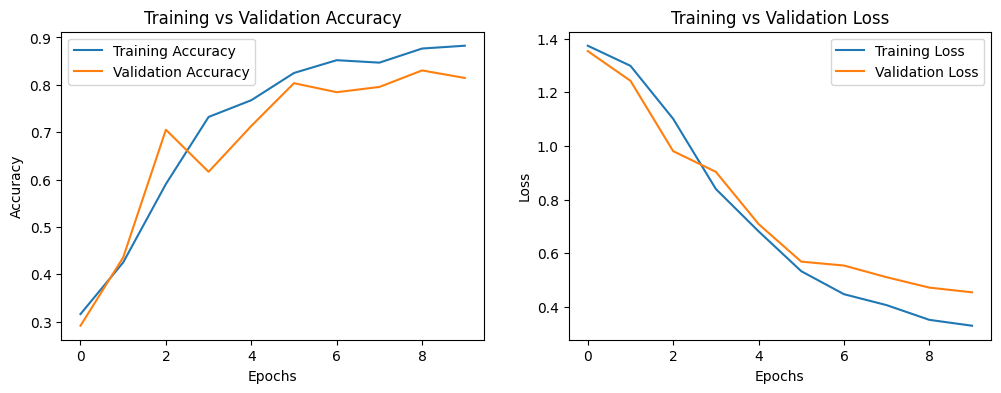

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


## Confusion Matrix Analysis

A confusion matrix provides a detailed breakdown of correct and incorrect
predictions for each class. This helps us understand which categories the model
confuses the most.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


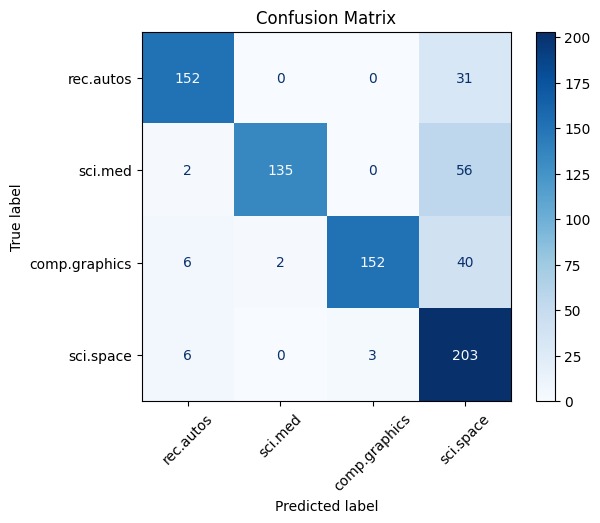

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate predictions
y_pred_probs = model.predict(X_test_tf)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=categories
)

disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


## Sample Predictions

Below are a few example predictions made by the trained model.
This helps demonstrate how the model behaves on real text inputs.


In [18]:
for i in range(5):
    print("Text:")
    print(X_test[i][:300], "...")
    print("Actual Label:", categories[y_test[i]])
    print("Predicted Label:", categories[y_pred[i]])
    print("-" * 80)


Text:
I'm not sure if this is the correct place to ask this question.  If not,
please forgive me and point me in the right direction.

Does anybody know of a program that converts .GIF files to .BMP files
and if so, where can I ftp it from?  Any help would be greatly 
appreciated.

Please respond via e-ma ...
Actual Label: rec.autos
Predicted Label: rec.autos
--------------------------------------------------------------------------------
Text:
: I have a little question:
: 
: I need to convert RGB-coded (Red-Green-Blue) colors into HVS-coded
: (Hue-Value-Saturnation) colors. Does anyone know which formulas to
: use?

Lets see if I have this right... HSV == HSB == HSL ... and none of those
are the same as HLS.  Hopefully, HVS is just a tra ...
Actual Label: rec.autos
Predicted Label: rec.autos
--------------------------------------------------------------------------------
Text:
I am looking for some clarification on a subject that I am trying to find some
information on.

How is HSV-2

## Conclusion

In this notebook, we built a deep learning based text classification model using
TensorFlow and Keras. Compared to the traditional TF-IDF + Logistic Regression
approach, this model learns semantic representations through embeddings and
neural networks.

### Key Takeaways:
- Deep learning models automatically learn feature representations
- Validation accuracy stabilized around ~81–85%
- Performance is comparable to classical ML with better scalability
- This architecture can be extended to CNNs, LSTMs, or Transformers

In the next notebook, we can further improve performance using advanced models
such as CNN, LSTM, or BERT.
